In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle


from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

import joblib

In [3]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('miadul/student-performance-dataset',unzip=True,path="./datasets")

Dataset URL: https://www.kaggle.com/datasets/miadul/student-performance-dataset


In [4]:
df =pd.read_csv('datasets/synthetic_student_performance.csv')
df.head(3)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,1,3,16,13,0,2,0,0,0,0,3.158425,1
1,1002,18,1,2,0,17,28,0,2,1,1,1,0,2.794655,2
2,1003,15,1,0,1,13,18,1,4,0,0,0,1,3.774847,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Gender             5000 non-null   int64  
 3   Ethnicity          5000 non-null   int64  
 4   ParentalEducation  5000 non-null   int64  
 5   StudyTimeWeekly    5000 non-null   int64  
 6   Absences           5000 non-null   int64  
 7   Tutoring           5000 non-null   int64  
 8   ParentalSupport    5000 non-null   int64  
 9   Extracurricular    5000 non-null   int64  
 10  Sports             5000 non-null   int64  
 11  Music              5000 non-null   int64  
 12  Volunteering       5000 non-null   int64  
 13  GPA                5000 non-null   float64
 14  GradeClass         5000 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 586.1 KB


In [6]:
df.isna().sum().sum()

np.int64(0)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df=df.drop(columns=['StudentID'])

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,16.485200,1.127136,15.0,15.000000,16.000000,18.000000,18.0
Gender,5000.0,0.510200,0.499946,0.0,0.000000,1.000000,1.000000,1.0
Ethnicity,5000.0,0.885400,1.038885,0.0,0.000000,0.000000,2.000000,3.0
ParentalEducation,5000.0,2.099400,1.229074,0.0,1.000000,2.000000,3.000000,4.0
StudyTimeWeekly,5000.0,10.031800,6.019438,0.0,5.000000,10.000000,15.000000,20.0
Absences,5000.0,15.065200,8.922223,0.0,8.000000,15.000000,23.000000,30.0
Tutoring,5000.0,0.312200,0.463437,0.0,0.000000,0.000000,1.000000,1.0
ParentalSupport,5000.0,2.296600,1.223817,0.0,2.000000,2.000000,3.000000,4.0
Extracurricular,5000.0,0.594800,0.490980,0.0,0.000000,1.000000,1.000000,1.0
Sports,5000.0,0.406600,0.491248,0.0,0.000000,0.000000,1.000000,1.0


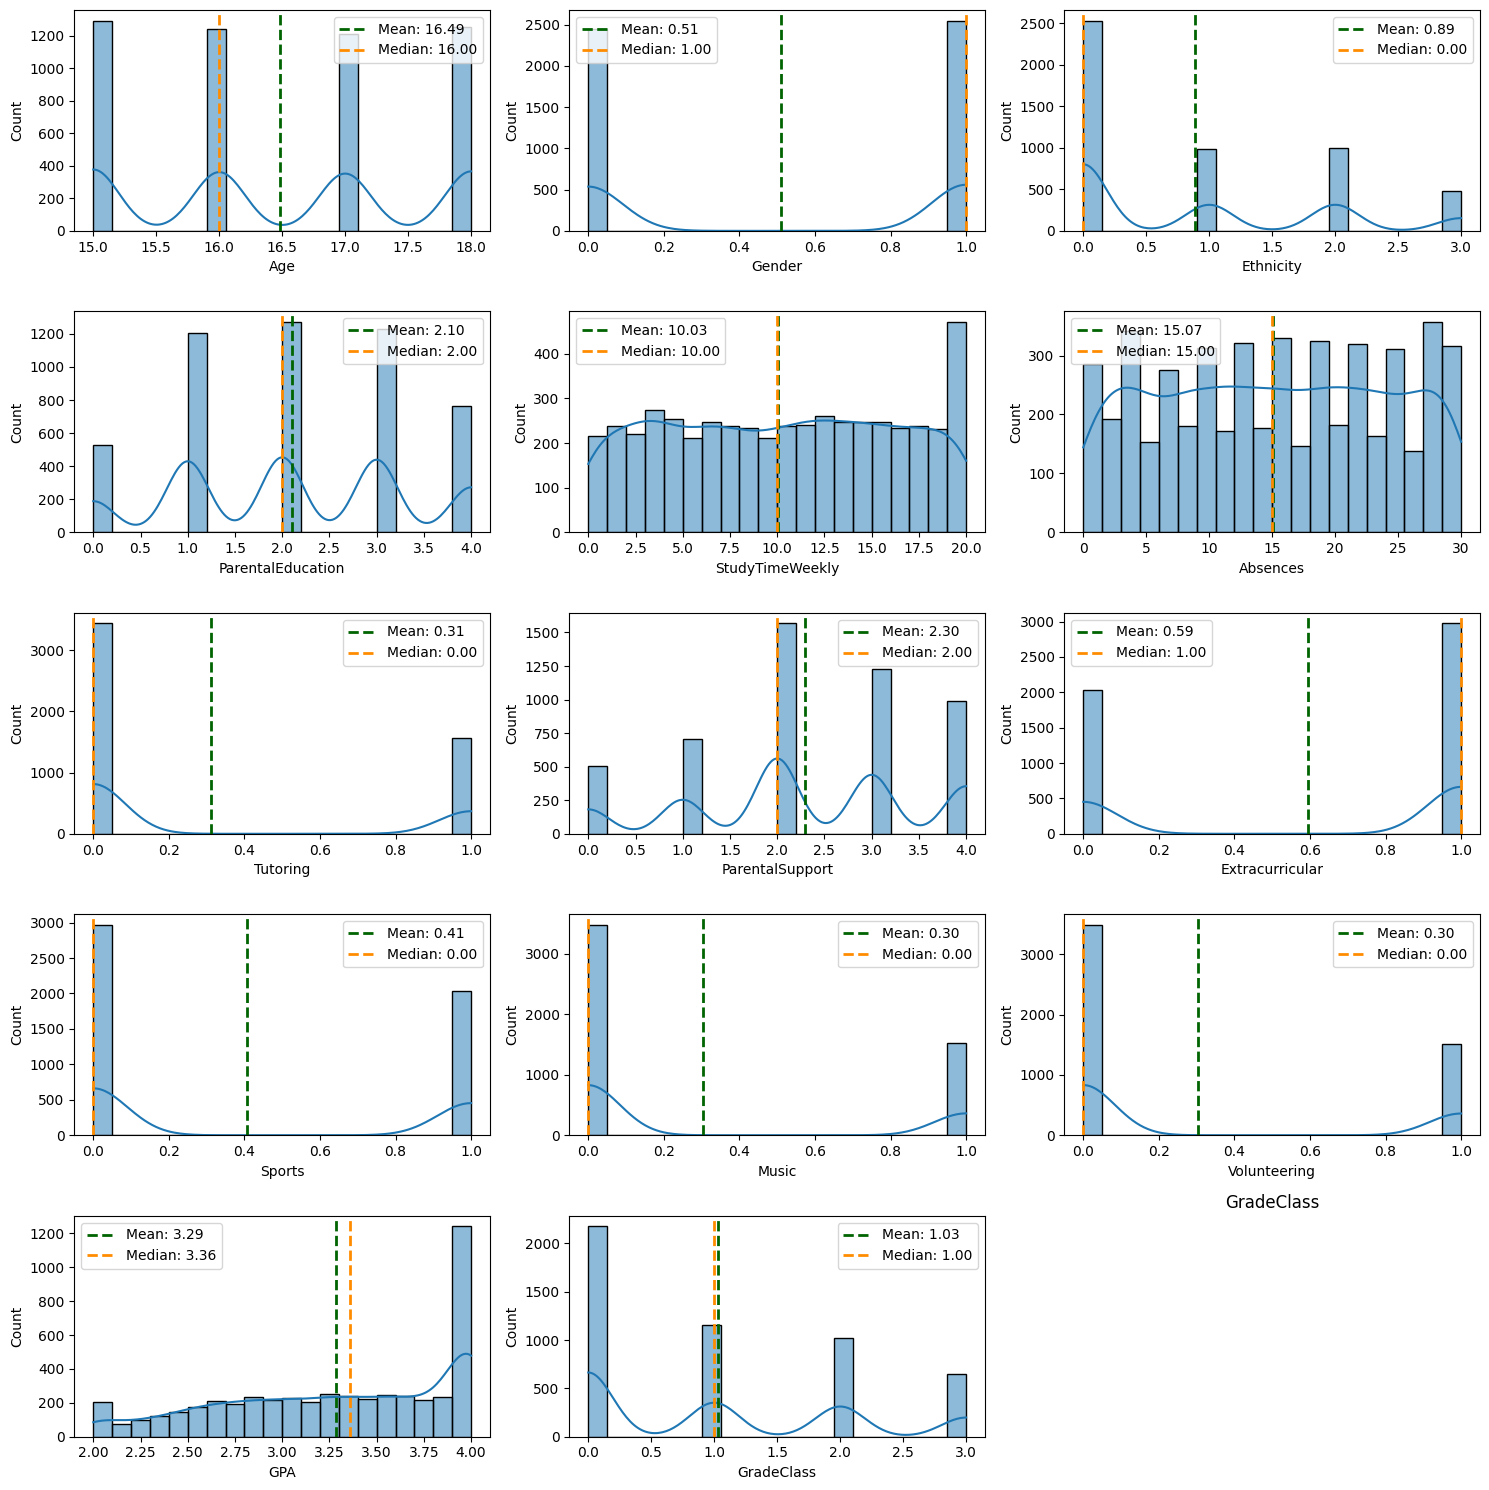

In [10]:
# UNIVARIATE ANALYSIS - DISTRIBUTION OF FEATURES

fig,axes = plt.subplots(5,3,figsize=(15,15))
axes = axes.flatten()

for i , col in enumerate(df.columns):
    sns.histplot(df[col],bins=20,kde=True,ax=axes[i],edgecolor = 'black')
    plt.title(col)

    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[i].axvline(mean_val, color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='darkorange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i].legend()

for j in range(i+1 ,len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [11]:
# TARGET VARIABLE ANALYSIS

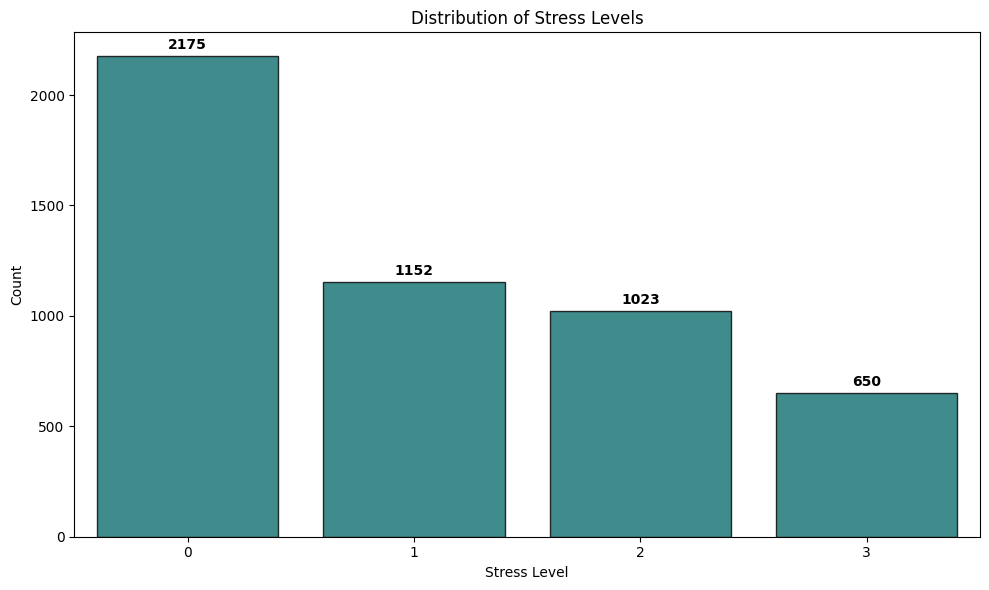

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='GradeClass', data=df, color='teal', edgecolor='black', alpha=0.8)
ax.set(title='Distribution of Stress Levels', xlabel='Stress Level', ylabel='Count')

ax.bar_label(ax.containers[0], label_type='edge', padding=3, weight='bold')

plt.tight_layout()
plt.show()


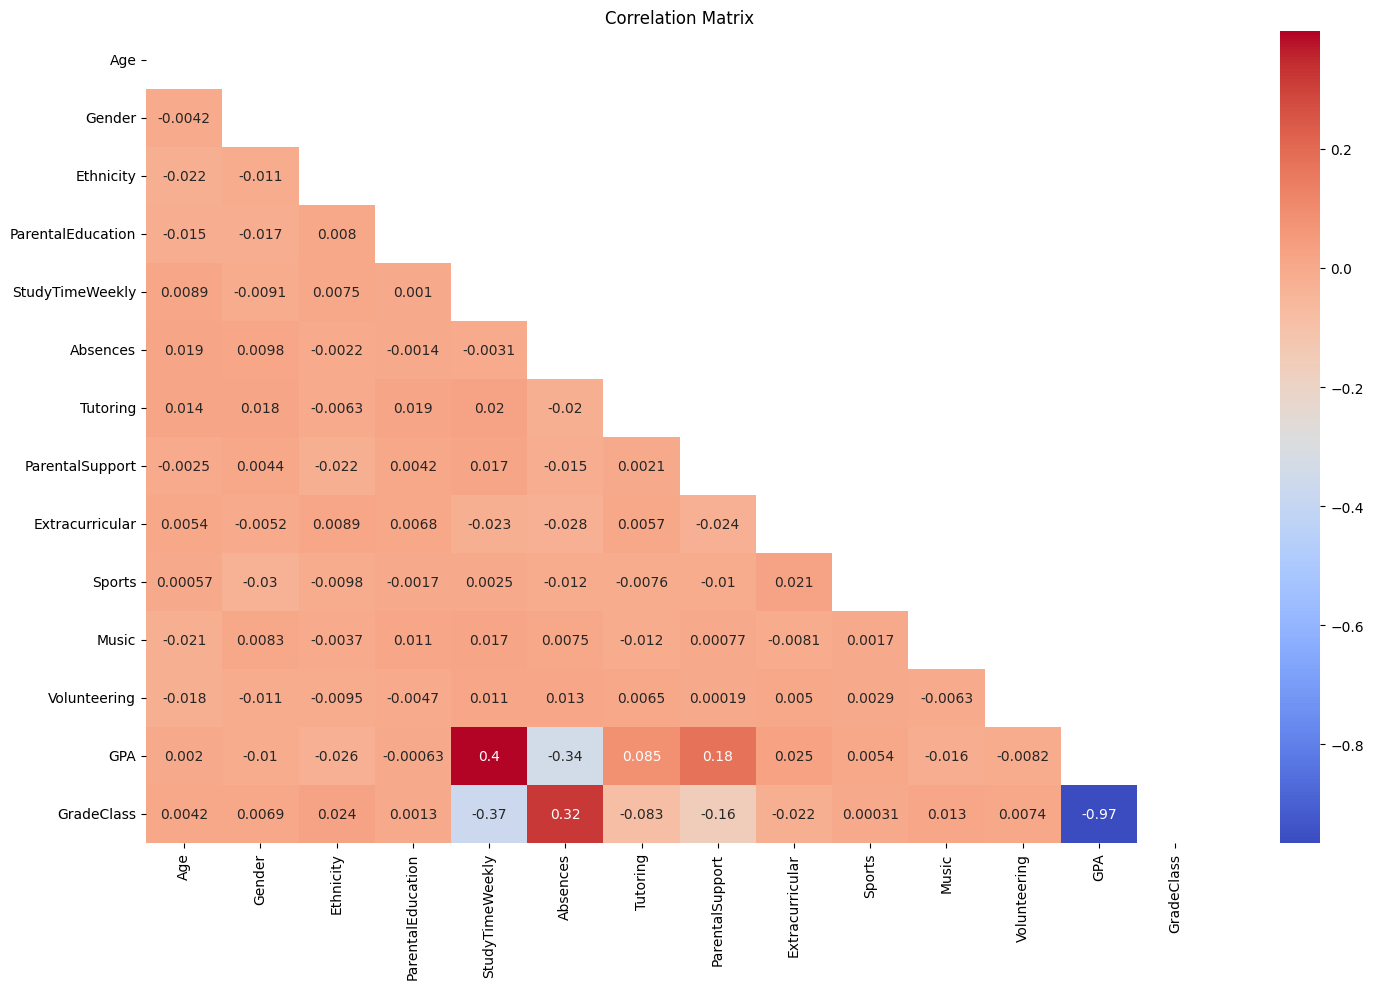

In [13]:
# Correlation 
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(corr_matrix,dtype = bool))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',mask = mask)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [14]:
grade_corr = corr_matrix['GradeClass'].drop('GradeClass').sort_values(ascending=False)
print(grade_corr.head(3))
print('='*80)
print(grade_corr.tail(3))

Absences     0.317774
Ethnicity    0.024139
Music        0.012525
Name: GradeClass, dtype: float64
ParentalSupport   -0.161839
StudyTimeWeekly   -0.369837
GPA               -0.965223
Name: GradeClass, dtype: float64


In [15]:
# Model Training
x = df.drop(columns=['GradeClass'])
y = df['GradeClass']


x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=7)

In [16]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestClassifier(random_state=7), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(x_train, y_train)

print("Best params:", grid.best_params_)
print("Best R² score on training folds:", grid.best_score_)


Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best R² score on training folds: 0.9977499997188204


Random Forest Performance
--------------------------
Train Accuracy: 1.0000
Test Accuracy:  0.9990

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       458
           1       1.00      1.00      1.00       220
           2       1.00      1.00      1.00       202
           3       1.00      0.99      1.00       120

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



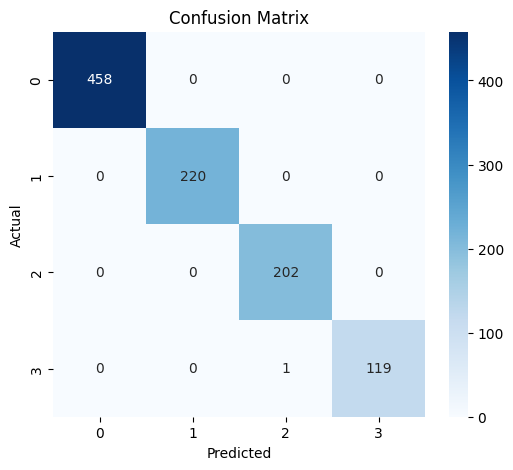

In [17]:

best_rf = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200,
    random_state=7
)

best_rf.fit(x_train, y_train)
y_pred_train = best_rf.predict(x_train)
y_pred_test = best_rf.predict(x_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Random Forest Performance")
print("--------------------------")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")

# Optional: detailed classification report on test set
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))


cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
joblib.dump(best_rf, './models/rf_model.pkl')
print("Model saved as random_forest_model.pkl")

Model saved as random_forest_model.pkl


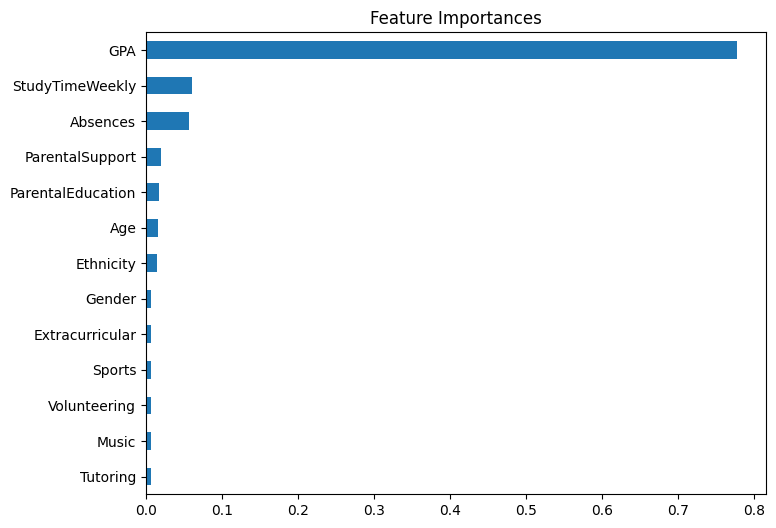

In [19]:
importances = pd.Series(best_rf.feature_importances_, index=x.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6), title='Feature Importances')
plt.show()
